In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("churn.csv")

In [4]:
#An overview of our data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

There are 7043 customers and 20 features. The target variable we want to be able to predict is Churn which is equal to 'Yes' if the customer churned, and 'No' otherwise

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#we check if ' ' values disappeared
np.unique(data.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [38]:
#this will allow us to convert the feature to numeric
data=data.replace(to_replace=" ",value=np.nan)

In [41]:
data.TotalCharges=pd.to_numeric(data.TotalCharges)

In [42]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now data types is correct

In [43]:
#we check if ' ' values disappeared
np.unique(data.TotalCharges.values)   

array([18.8 , 18.85, 18.9 , ...,   nan,   nan,   nan])

In [44]:
#now let's look at basic statistics
data.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
#how many missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

This table show that there are 11 missing values in TotalCharges

In [45]:
numeric = data.select_dtypes(include=[np.number])
numeric.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [46]:
categorical= data.select_dtypes(include=[np.object])
categorical.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [47]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [48]:
data.groupby('gender').size()

gender
Female    3488
Male      3555
dtype: int64

In [49]:
# What is the percentage of churners
data.groupby('Churn').size()/len(data)

Churn
No     0.73463
Yes    0.26537
dtype: float64

# Univariate Analysis

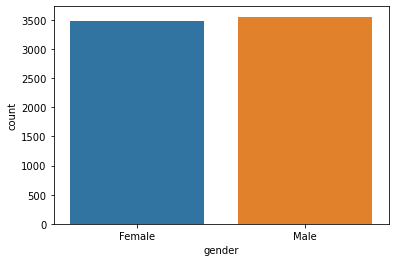

In [50]:
sns.countplot(x='gender', data=data)
plt.show()

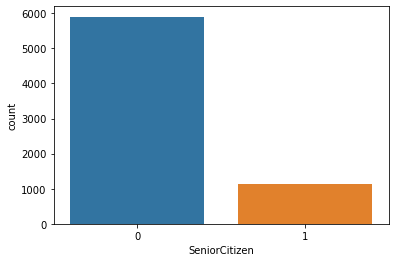

In [51]:
sns.countplot(x='SeniorCitizen', data=data)
plt.show()

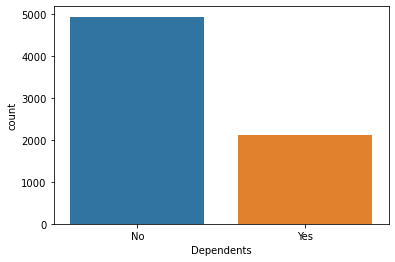

In [52]:
sns.countplot(x='Dependents', data=data)
plt.show()

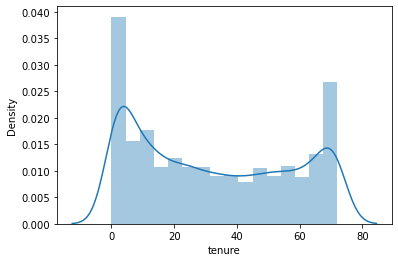

In [53]:
#distribution with kernel density estimation.
sns.distplot(data.tenure)
plt.show()

The plot shows that there are many people who stay for a short time, and many people who stay for more than 60 months.

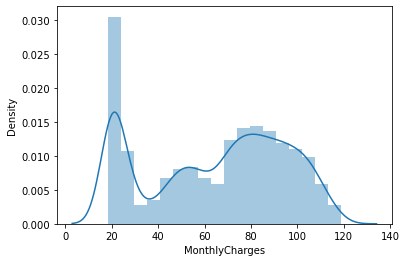

In [54]:
sns.distplot(data.MonthlyCharges)
plt.show()

A lot of people have minimum monthly charges because they choose the cheapest offer

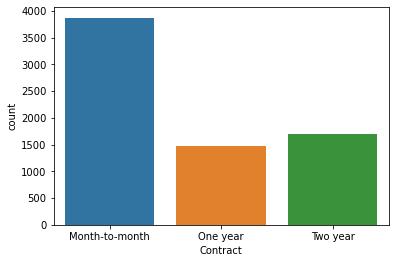

In [55]:
sns.countplot(x='Contract', data=data)
plt.show()

Most customers have a Month-to-month contract

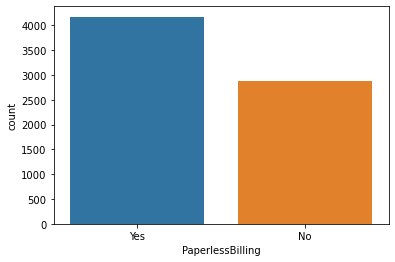

In [56]:
sns.countplot(x='PaperlessBilling', data=data)
plt.show()

A lot of customers have a paperless billing

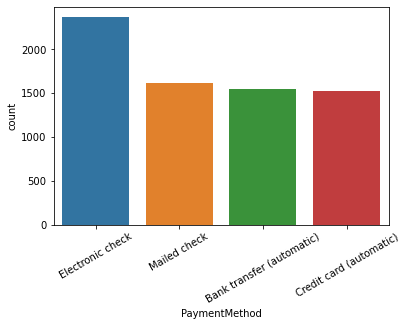

In [57]:
ax = sns.countplot(x='PaymentMethod', data=data)
plt.setp(ax.get_xticklabels(),rotation=30)[1]

The different method by which customers do the payment

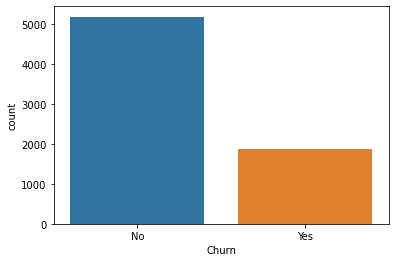

In [58]:
sns.countplot(x='Churn', data=data)
plt.show()

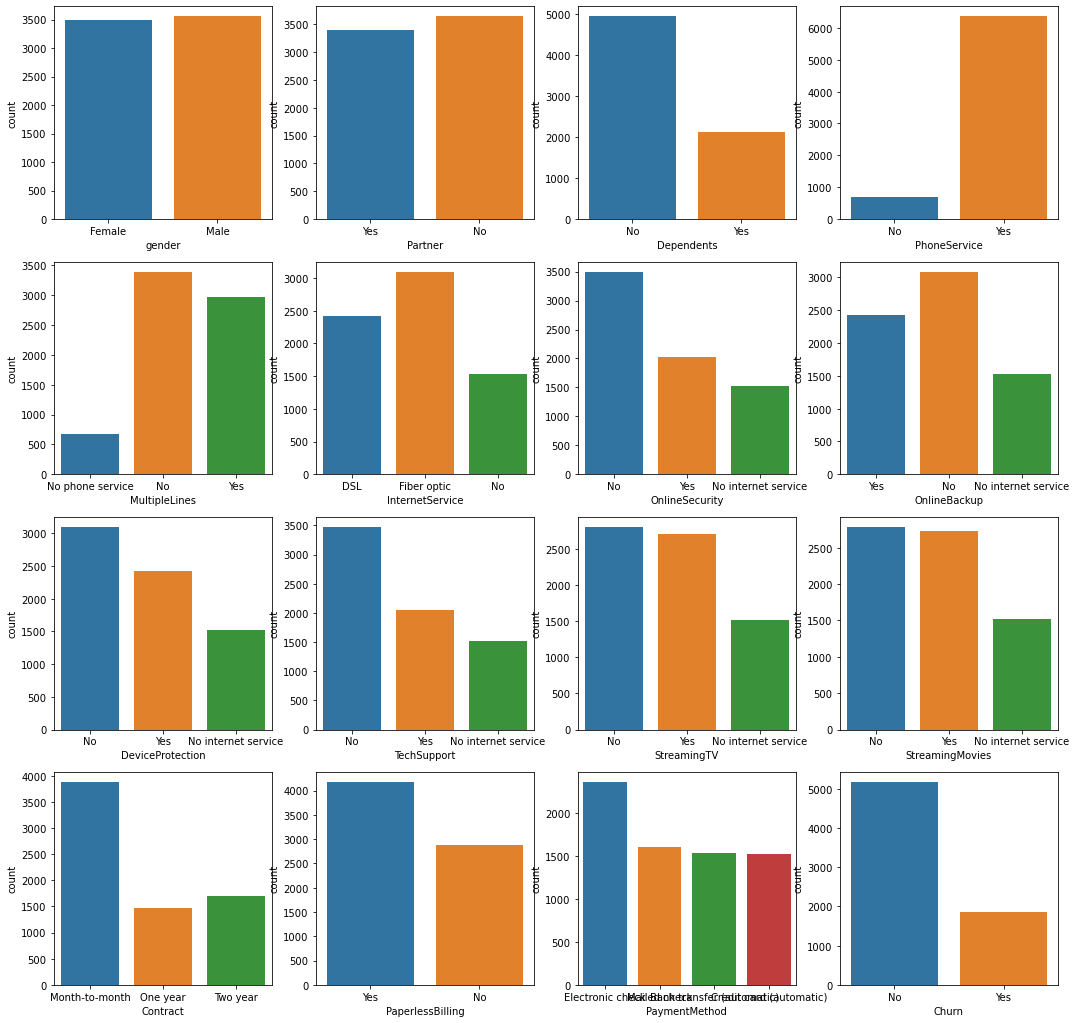

In [59]:
#We plot synthesis of the charts of all the features
plt.figure(figsize=(18, 18))

for k in range(1, len(categorical.columns)):
    plt.subplot(4, 4, k)
    sns.countplot(x=categorical.columns[k], data=data)

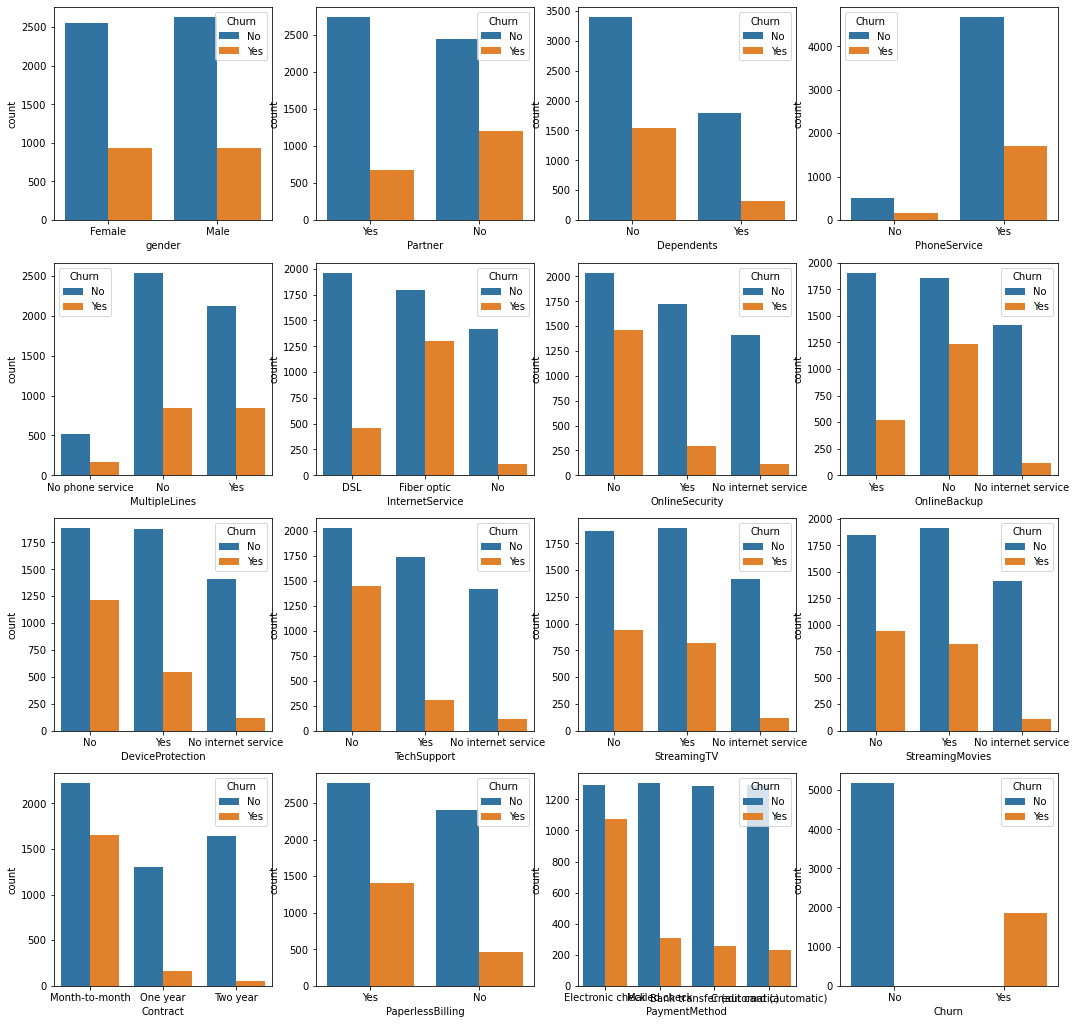

In [60]:
plt.figure(figsize=(18, 18))

for k in range(1, len(categorical.columns)):
    plt.subplot(4, 4, k)
    sns.countplot(x=categorical.columns[k], data=data, hue='Churn')

*Those who have optical fiber there are many who churn, those who have no technical support, no device protection probably due to a lack of quality.  89% churn because they look for a better quality

*Those who have a month-to-month contract are more likely to churn


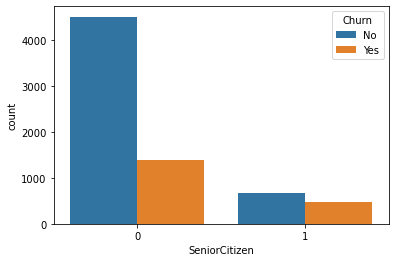

In [61]:
sns.countplot(x='SeniorCitizen', data=data, hue='Churn')
plt.show()

In [64]:
#we plot the statistists according to the Internet Service
data.drop(columns='SeniorCitizen').groupby('InternetService').describe().T

InternetService               DSL  Fiber optic           No
tenure         count  2421.000000  3096.000000  1526.000000
               mean     32.821561    32.917959    30.547182
               std      24.812178    24.425332    24.356507
               min       0.000000     1.000000     0.000000
               25%       9.000000     9.000000     8.000000
               50%      29.000000    30.000000    25.000000
               75%      56.000000    56.000000    52.750000
               max      72.000000    72.000000    72.000000
MonthlyCharges count  2421.000000  3096.000000  1526.000000
               mean     58.102169    91.500129    21.079194
               std      16.259522    12.663039     2.164221
               min      23.450000    67.750000    18.250000
               25%      46.200000    80.550000    19.700000
               50%      56.150000    91.675000    20.150000
               75%      69.900000   101.150000    20.900000
               max      94.800000   118.750000    26.900000
TotalCharges   count  2416.000000  3096.000000  1520.000000
               mean   2119.789259  3205.304570   665.220329
               std    1880.169236  2570.220105   555.158112
               min      23.450000    68.500000    18.800000
               25%     435.250000   795.125000   159.875000
               50%    1600.950000  2660.650000   523.675000
               75%    3492.737500  5451.375000  1110.050000
               max    6859.050000  8684.800000  2006.950000

We have seen previously that there is a very high churn rate for those who have a fiber optic service, but we can observe in these statistics that they are also those who bring the most money to the company on average.

In [65]:
# We plot the statistics according to the 'Partner' variable
data.drop(columns='SeniorCitizen').groupby('Partner').describe().T

Partner                        No          Yes
tenure         count  3641.000000  3402.000000
               mean     23.357869    42.017637
               std      21.769526    23.698742
               min       0.000000     0.000000
               25%       4.000000    21.000000
               50%      16.000000    46.000000
               75%      39.000000    65.000000
               max      72.000000    72.000000
MonthlyCharges count  3641.000000  3402.000000
               mean     61.945001    67.776264
               std      29.060087    30.875503
               min      18.250000    18.400000
               25%      34.050000    39.362500
               50%      68.650000    74.800000
               75%      85.400000    94.050000
               max     118.650000   118.750000
TotalCharges   count  3639.000000  3393.000000
               mean   1584.960429  3032.271648
               std    1874.788687  2407.614842
               min      18.850000    18.800000
               25%     191.200000   929.450000
               50%     811.800000  2347.900000
               75%    2337.300000  5000.200000
               max    8547.150000  8684.800000

In [66]:
data.drop(columns='SeniorCitizen').groupby('Dependents').describe().T

Dependents                     No          Yes
tenure         count  4933.000000  2110.000000
               mean     29.806000    38.368246
               std      24.259877    24.213340
               min       1.000000     0.000000
               25%       7.000000    16.000000
               50%      25.000000    39.000000
               75%      52.000000    62.000000
               max      72.000000    72.000000
MonthlyCharges count  4933.000000  2110.000000
               mean     67.002808    59.522156
               std      29.274849    31.301735
               min      18.250000    18.700000
               25%      44.850000    24.500000
               50%      73.900000    60.975000
               75%      90.650000    85.950000
               max     118.650000   118.750000
TotalCharges   count  4933.000000  2099.000000
               mean   2187.709254  2507.955669
               std    2241.593582  2309.884010
               min      18.850000    18.800000
               25%     323.250000   596.275000
               50%    1322.550000  1551.600000
               75%    3581.400000  4161.325000
               max    8684.800000  8672.450000

In [67]:
data.drop(columns='SeniorCitizen').groupby('OnlineBackup').describe().T

OnlineBackup                   No  No internet service          Yes
tenure         count  3088.000000          1526.000000  2429.000000
               mean     23.680699            30.547182    44.565253
               std      21.551583            24.356507    23.223725
               min       0.000000             0.000000     0.000000
               25%       4.000000             8.000000    25.000000
               50%      17.000000            25.000000    50.000000
               75%      39.000000            52.750000    66.000000
               max      72.000000            72.000000    72.000000
MonthlyCharges count  3088.000000          1526.000000  2429.000000
               mean     71.938002            21.079194    83.081597
               std      21.021906             2.164221    21.462684
               min      23.450000            18.250000    28.450000
               25%      54.600000            19.700000    66.300000
               50%      74.750000            20.150000    85.800000
               75%      88.812500            20.900000   100.700000
               max     112.950000            26.900000   118.750000
TotalCharges   count  3087.000000          1520.000000  2425.000000
               mean   1828.148364           665.220329  3876.923629
               std    1883.027587           555.158112  2397.985666
               min      23.450000            18.800000    29.850000
               25%     279.950000           159.875000  1782.400000
               50%    1131.200000           523.675000  3899.050000
               75%    2877.500000          1110.050000  5869.400000
               max    8240.850000          2006.950000  8684.800000

In [68]:
#the aim would then be to push customers to take on longer-term contracts
data.drop(columns='SeniorCitizen').groupby('Contract').describe().T

Contract              Month-to-month     One year     Two year
tenure         count     3875.000000  1473.000000  1695.000000
               mean        18.036645    42.044807    56.735103
               std         17.689054    19.035883    18.209363
               min          1.000000     0.000000     0.000000
               25%          3.000000    27.000000    48.000000
               50%         12.000000    44.000000    64.000000
               75%         29.000000    58.000000    71.000000
               max         72.000000    72.000000    72.000000
MonthlyCharges count     3875.000000  1473.000000  1695.000000
               mean        66.398490    65.048608    60.770413
               std         26.926599    31.840539    34.678865
               min         18.750000    18.250000    18.400000
               25%         45.850000    26.900000    24.025000
               50%         73.250000    68.750000    64.350000
               75%         88.875000    94.800000    90.450000
               max        117.450000   118.600000   118.750000
TotalCharges   count     3875.000000  1472.000000  1685.000000
               mean      1369.254581  3034.683084  3728.933947
               std       1613.879008  2229.730075  2571.252806
               min         18.850000    18.800000    20.350000
               25%        160.100000   989.350000  1278.800000
               50%        679.550000  2657.550000  3623.950000
               75%       2066.500000  4859.525000  5999.850000
               max       8061.500000  8684.800000  8672.450000

In [69]:
data.drop(columns='SeniorCitizen').groupby('PaymentMethod').describe().T

PaymentMethod         Bank transfer (automatic)  Credit card (automatic)  \
tenure         count                1544.000000              1522.000000   
               mean                   43.656736                43.269382   
               std                    23.197901                23.339581   
               min                     0.000000                 0.000000   
               25%                    23.000000                23.000000   
               50%                    48.000000                47.000000   
               75%                    66.000000                66.000000   
               max                    72.000000                72.000000   
MonthlyCharges count                1544.000000              1522.000000   
               mean                   67.192649                66.512385   
               std                    30.555200                30.612424   
               min                    18.400000                18.250000   
               25%                    41.087500                38.662500   
               50%                    73.100000                73.025000   
               75%                    92.962500                90.850000   
               max                   118.750000               117.500000   
TotalCharges   count                1542.000000              1521.000000   
               mean                 3079.299546              3071.396022   
               std                  2357.735491              2407.402613   
               min                    19.250000                19.300000   
               25%                  1052.362500               989.050000   
               50%                  2474.650000              2453.300000   
               75%                  4943.150000              5016.250000   
               max                  8684.800000              8670.100000   

PaymentMethod         Electronic check  Mailed check  
tenure         count       2365.000000   1612.000000  
               mean          25.174630     21.830025  
               std           22.382301     21.218374  
               min            1.000000      0.000000  
               25%            5.000000      3.000000  
               50%           18.000000     15.000000  
               75%           43.000000     36.000000  
               max           72.000000     72.000000  
MonthlyCharges count       2365.000000   1612.000000  
               mean          76.255814     43.917060  
               std           24.053655     26.314665  
               min           18.850000     18.700000  
               25%           60.150000     20.150000  
               50%           80.550000     34.700000  
               75%           94.700000     64.912500  
               max          118.650000    118.600000  
TotalCharges   count       2365.000000   1604.000000  
               mean        2090.868182   1054.483915  
               std         2155.435320   1442.869051  
               min           18.850000     18.800000  
               25%          308.050000    114.550000  
               50%         1253.900000    467.350000  
               75%         3340.550000   1294.125000  
               max         8564.750000   8331.950000

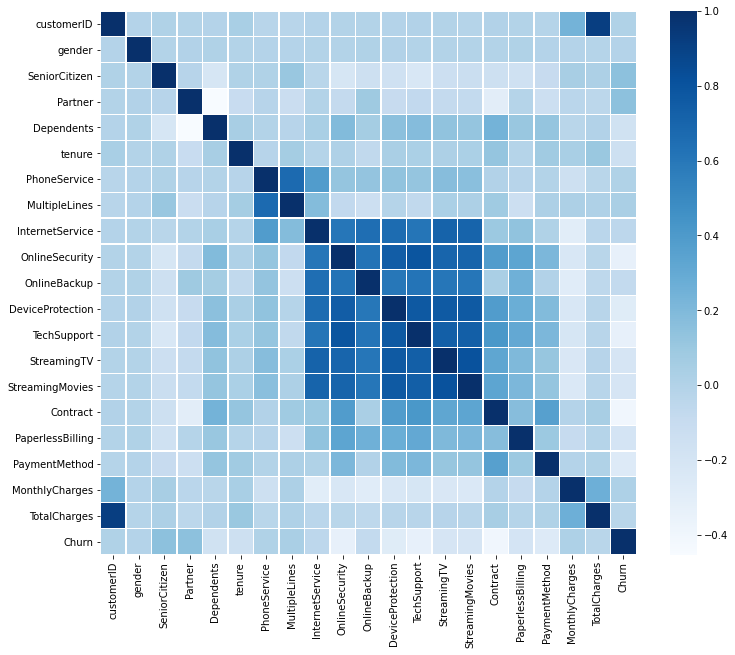

In [70]:
#We plot the correlation matrix, the darker a box is, the more features are correlated
plt.figure(figsize=(12, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap='Blues')

*Internet service, Online security, Online Backup, DeviceProtection, Tech Support and streaming are highly correlated features.

*Total charges and customer ID are also very correlated, maybe the ID is chosen according to high-potential customers.

*The most correlated to churn : Senior, Partner, Multiple lines, online backup, Monthly charges'

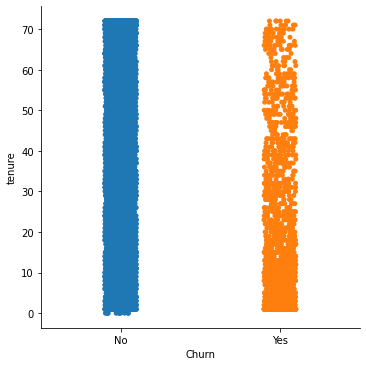

In [71]:
#analysing numeric features regarding the Churn
sns.catplot(x='Churn', y='tenure', data=data)
plt.show()

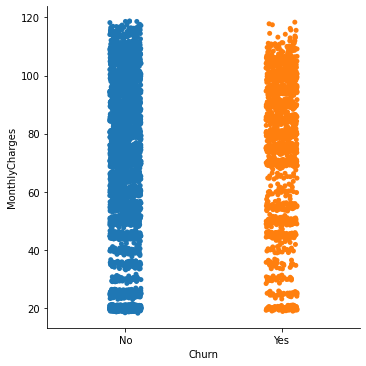

In [72]:
sns.catplot(x='Churn', y='MonthlyCharges', data=data)
plt.show()

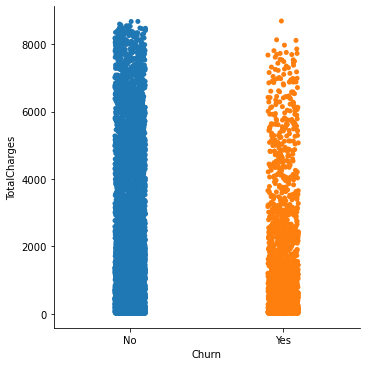

In [73]:
sns.catplot(x='Churn', y='TotalCharges', data=data)
plt.show()

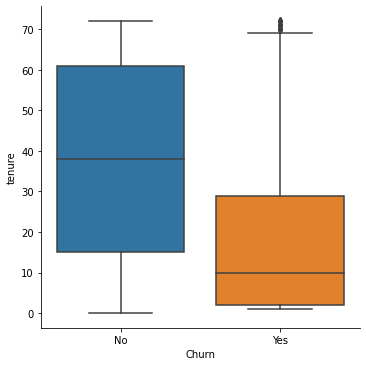

In [74]:
sns.catplot(x='Churn', y='tenure', kind='box', data=data)
plt.show()

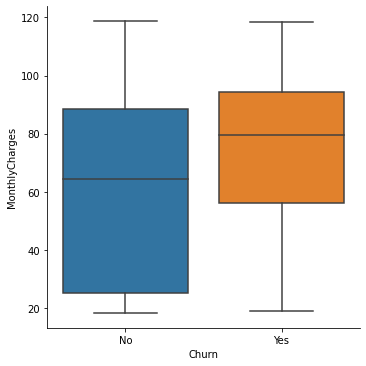

In [75]:
sns.catplot(x='Churn', y='MonthlyCharges', kind='box', data=data)
plt.show()

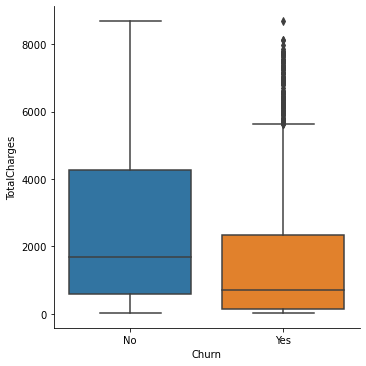

In [76]:
sns.catplot(x='Churn', y='TotalCharges', kind='box', data=data)
plt.show()

*On average, those who have churned stayed less than a year (10 months) while those who stayed have been there for 3 years.

*75% of those who have churned stayed less than 30 months.

*A quarter of loyal customers have been here for more than 5 years.

# Model selection

In [78]:
#indices of missing values
missing_index = np.array(data.isnull()).nonzero()[0]

In [79]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
#target
y = data.Churn
X = data.drop(columns=['Churn', 'customerID'])
y = y.drop(index=missing_index)

In [81]:
#label encoding for gender feature
X['gender'] = X['gender'].map({'Male':1, 'Female':0})

#label encoding for other binary features
binary_variables = ['Partner','Dependents','PhoneService','PaperlessBilling']
X[binary_variables] = X[binary_variables].replace({'Yes':1, 'No':0})

#we scale numeric features because they have different magnitudes which can impact the performance of our model
X['tenure'] = (X['tenure'] - X['tenure'].mean()) / X['tenure'].std()
X['MonthlyCharges'] = (X['MonthlyCharges'] - X['MonthlyCharges'].mean()) / X['MonthlyCharges'].std()
X['TotalCharges'] = (X['TotalCharges'] - X['TotalCharges'].mean()) / X['TotalCharges'].std()

In [83]:
#categorical features with more than 2 options
other_variables = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
onehot_encoded = pd.get_dummies(X[other_variables])
onehot_encoded.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [84]:
#features to scale to address the problem of features that are on different magnitudes
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [85]:
#we drop these variables, then concatenate the table with the one-hot encoded version
X = X.drop(columns=other_variables)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277354,0,1,-1.160241,-0.994123
1,1,0,0,0,0.066323,1,0,-0.259611,-0.173727
2,1,0,0,0,-1.236636,1,1,-0.362635,-0.959581
3,1,0,0,0,0.514215,0,0,-0.746482,-0.195234
4,0,0,0,0,-1.236636,1,1,0.197351,-0.940391


In [86]:
#There are only 11 missing values, so we can simply drop them
X = X.dropna()

In [87]:
#label encoding for target feature
y = y.map({'Yes':1, 'No':0})

In [88]:

#We split the dataset into train set (70%) and test set (30%)
l = len(X)
split = int(l*0.7) 
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#We convert the pandas dataframes into numpy matrices
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

# Training Models

In [92]:
#Logistic Regression
logit = LogisticRegression(random_state=75, solver='liblinear')
logit.fit(X_train, y_train)
y_logit_pred = logit.predict_proba(X_test)

In [93]:
logit_score = roc_auc_score(y_true=y_test,y_score=y_logit_pred[:,1])
print('Logistic Regression score : {}'.format(logit_score))

Logistic Regression score : 0.8217517466756818


In [94]:
#Decission Trees
first_tree = DecisionTreeClassifier(random_state=75)
first_tree.fit(X_train,y_train)
y1_tree_pred = first_tree.predict_proba(X_test)

In [95]:
tree1_score = roc_auc_score(y_true=y_test, y_score=y1_tree_pred[:,1])
print('First Decision Tree Score : {}'.format(tree1_score))

First Decision Tree Score : 0.6478172188415596


The Logistic Regression model has the best score of 82%